In [ ]:
import nba_api as nb
import numpy as np
import pandas as pd
import scipy as sp
import math


So far, this code inputs a metric for two successive years depicting a player's overall value and outputs the predicted value for a third year. Depending on the random seed, the LSTM either predicts the third value to always be larger or always be smaller than the second. The next step is to include either player age or the amount of years the player has been in the league as an additional variable to more accurately predict growth/recession. It does a decent job predicting how older players get worse and younger players get better, but it needs to be more accurate still and also needs to be able to do both simultaneously

In [ ]:
from nba_api.stats.endpoints import playercareerstats as pcs
from nba_api.stats.endpoints import boxscoreadvancedv2 as adv
from nba_api.stats.static import players


In [ ]:
#Download all stats of all players who ever played in the NBA

ef = []
i = 0
for player in nba_players:
    ID = player["id"]
    career = pcs.PlayerCareerStats(player_id=ID)
    ef.append(career.get_data_frames()[0])
    i = i + 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82


ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [12]:
#Makes a list of seasons by year

years = []
season = "1983"+"-84"
#years.append('Name')
while int(season[:4]) < 2024:
    years.append(season)
    int1 = int(season[:4])+1
    int2 = int(season[5:7])+1
    if int2 == 100:
        int2 = 0
        season = str(str(int1) + '-' + str(int2) + str(int2))
    if int2 < 10:
        season = str(str(int1) + '-' + '0' + str(int2))
    elif int2 != 100:
        season = str(str(int1) + str(-int2))

In [ ]:
#Makes a DF of points/game each year for each player after 1983 
#when all stats needed were initially counted

temp = 0
WIN_df = pd.DataFrame(columns=years)
j = 0
ID = []
for player in ef:
    i = 0
    for year in player["SEASON_ID"]:
        if int(year[0:4]) == 2024:
            p = 1
        elif int(year[0:4]) >= 1983:
            if temp == year:
                temp = year
                WIN_df.at[j, temp] = [player["PTS"][i]/player["GP"][i],player["PLAYER_ID"][0]]
                i = i + 1     
            elif temp != year:
                temp = year
                WIN_df.at[j, year] = [player["PTS"][i]/player["GP"][i],player["PLAYER_ID"][0]]
                i = i + 1
        elif int(year[0:4]) < 1983:
            if temp == year:
                temp = year
                i = i + 1
            elif temp != year:
                temp = year
                i = i + 1
    if int(temp[0:4]) >= 1983:
        j = j + 1 
    if not player.empty:
        ID.append(player["PLAYER_ID"][0])

In [15]:
#Applies each players PPG to a year
columns = list(WIN_df)

,1983-84,1984-85,1985-86,1986-87,1987-88,1988-89,1989-90,1990-91,1991-92,1992-93,...,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[3.13953488372093, 76001]","[6.084507042253521, 76001]","[7.706666666666667, 76001]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[21.4625, 76003]","[21.962025316455698, 76003]","[23.367088607594937, 76003]","[17.512820512820515, 76003]","[14.5625, 76003]","[10.108108108108109, 76003]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[14.059701492537313, 51]","[10.333333333333334, 51]","[19.17283950617284, 51]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"[1.2105263157894737, 1627757]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"[5.454545454545454, 1627835]","[4.037037037037037, 1627835]",NaN,NaN,NaN,NaN,NaN,NaN
3450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"[3.71875, 1627790]","[7.779661016949152, 1627790]","[4.363636363636363, 1627790]",NaN,NaN,NaN,NaN


In [26]:
#Finds and stores the index of top 40 scorers that season

avg_pts_index = []
for column in columns:
    i = 0
    if column == 'Name':
        i = 1
    elif column != 'Name':
        a = WIN_df.sort_values(by=[column], ascending=False)
        temp1 = []
        for values in a[column]:
            i = i + 1
            temp1.append(values[1])
            if i == 40:
                break
            #row_number = a.index[a[column] == values]
            #temp.append(row_number)
            #print(temp1)
        avg_pts_index.append(temp1)

In [30]:
#Restructures indecis of highest averages to make more sense

i = 0
avg = []
while i < len(avg_pts_index):
    temp = []
    j = 0
    while j < 40:
        temp.append(avg_pts_index[i][j])
        j = j + 1
    i = i + 1
    avg.append(temp)

In [18]:
#Stores all player data

# open file
with open('nba.txt', 'w+') as f:
    
    # write elements of list
    for items in ef:
        f.write('%s\n' %items)
    
    print("File written successfully")


# close the file
f.close()

File written successfully


In [19]:
#Points per Possession for each Season

PPP = [1.8,1.8,1.8,1.9,1.8,1.8,1.9,1.8,1.9,1.9,1.7,1.9,1.8,1.7,1.6,1.3,1.5,1.4,1.5,1.4,1.4,1.7,1.7,1.7,1.8,1.9,1.8,1.8,1.5,1.7,1.7,1.6,1.7,1.9,1.9,1.11,1.11,1.13,1.13,1.16,1.16]

41

In [20]:
#Finds, reads, and neatly stores all necessary player data into a DF, accounting for several errors

temp = 0
df = pd.DataFrame(columns=years)
j = 0
for player in ef:
    i = 0
    temp2 = '0000'
    temp1 = '0000'
    for year in player["SEASON_ID"]:
        if int(year[0:4]) >= 1983:
            if int(year[0:4]) == 2024:
                a = 0
            elif temp2 == year:
                temp2 = year
                MIN = player["MIN"][i]
                TwoFG = (player["FGA"][i] - player["FG3A"][i])/MIN
                TwoPct = (player["FGM"][i]-player["FG3M"][i])/MIN/TwoFG
                OREB = (player["OREB"][i])/MIN
                DREB = (player["DREB"][i])/MIN
                FT = (player["FTA"][i])/MIN
                FTPct = (player["FT_PCT"][i])
                ThrFG = (player["FG3A"][i])/MIN
                ThrPct = (player["FG3_PCT"][i])
                BLK = (player["BLK"][i])/MIN
                STL = (player["STL"][i])/MIN
                TOV = (player["TOV"][i])/MIN
                AST = (player["AST"][i])/MIN
                PF = (player["PF"][i])/MIN
                IND = player["PLAYER_ID"][i]
                temp1 = year
                df.at[j, temp2] = [TwoFG,TwoPct,OREB,DREB,FT,FTPct,ThrFG,ThrPct,BLK,STL,TOV,AST,PF,IND,MIN]
                i = i + 1
            elif temp1 == year:
                temp1 = year
                MIN = player["MIN"][i]
                TwoFG = (player["FGA"][i] - player["FG3A"][i])/MIN
                TwoPct = (player["FGM"][i]-player["FG3M"][i])/MIN/TwoFG
                OREB = (player["OREB"][i])/MIN
                DREB = (player["DREB"][i])/MIN
                FT = (player["FTA"][i])/MIN
                FTPct = (player["FT_PCT"][i])
                ThrFG = (player["FG3A"][i])/MIN
                ThrPct = (player["FG3_PCT"][i])
                BLK = (player["BLK"][i])/MIN
                STL = (player["STL"][i])/MIN
                TOV = (player["TOV"][i])/MIN
                AST = (player["AST"][i])/MIN
                PF = (player["PF"][i])/MIN
                IND = player['PLAYER_ID'][i]
                temp1 = year
                temp2 = temp1
                df.at[j, temp1] = [TwoFG,TwoPct,OREB,DREB,FT,FTPct,ThrFG,ThrPct,BLK,STL,TOV,AST,PF,IND,MIN]
                i = i + 1     
            elif temp1 != year:
                MIN = player["MIN"][i]
                TwoFG = (player["FGA"][i] - player["FG3A"][i])/MIN
                TwoPct = (player["FGM"][i]-player["FG3M"][i])/MIN/TwoFG
                OREB = (player["OREB"][i])/MIN
                DREB = (player["DREB"][i])/MIN
                FT = (player["FTA"][i])/MIN
                FTPct = (player["FT_PCT"][i])
                ThrFG = (player["FG3A"][i])/MIN
                ThrPct = (player["FG3_PCT"][i])
                BLK = (player["BLK"][i])/MIN
                STL = (player["STL"][i])/MIN
                TOV = (player["TOV"][i])/MIN
                AST = (player["AST"][i])/MIN
                PF = (player["PF"][i])/MIN
                IND = player['PLAYER_ID'][i]
                temp1 = year
                df.at[j, temp1] = [TwoFG,TwoPct,OREB,DREB,FT,FTPct,ThrFG,ThrPct,BLK,STL,TOV,AST,PF,IND,MIN]
                i = i + 1
        elif int(year[0:4]) < 1983:
            if int(year[0:4]) == 2024:
                a = 0
            elif temp1 == year:
                temp1 = year
                i = i + 1
            elif temp1 != year:
                temp1 = year
                i = i + 1
    if int(temp1[0:4]) >= 1983:
        j = j + 1

<ipython-input-20-b3f4e0993da3>:56: RuntimeWarning: invalid value encountered in double_scalars
  TwoPct = (player["FGM"][i]-player["FG3M"][i])/MIN/TwoFG
<ipython-input-20-b3f4e0993da3>:36: RuntimeWarning: invalid value encountered in double_scalars
  TwoPct = (player["FGM"][i]-player["FG3M"][i])/MIN/TwoFG
<ipython-input-20-b3f4e0993da3>:55: RuntimeWarning: invalid value encountered in true_divide
  TwoFG = (player["FGA"][i] - player["FG3A"][i])/MIN
<ipython-input-20-b3f4e0993da3>:56: RuntimeWarning: invalid value encountered in true_divide
  TwoPct = (player["FGM"][i]-player["FG3M"][i])/MIN/TwoFG
<ipython-input-20-b3f4e0993da3>:57: RuntimeWarning: invalid value encountered in true_divide
  OREB = (player["OREB"][i])/MIN
<ipython-input-20-b3f4e0993da3>:58: RuntimeWarning: invalid value encountered in true_divide
  DREB = (player["DREB"][i])/MIN
<ipython-input-20-b3f4e0993da3>:59: RuntimeWarning: invalid value encountered in true_divide
  FT = (player["FTA"][i])/MIN
<ipython-input-20-b3

In [38]:
#Finds Averages per seassaon of a few important stats

columns = list(df)
avg = []
Sum = []
k = 0

for column in columns:
    temp = []
    j = 0
    TwoSum = 0
    ThrSum = 0
    FTSum = 0
    PFSum = 0
    [TwoFG,TwoPct,OREB,DREB,FT,FTPct,ThrFG,ThrPct,BLK,STL,TOV,AST,PF,IND]
    while j < 15:
        i = 0
        s = 0
        n = 0
        while i < 1876:
            #print(i)
            if type(df[column][i]) == list:
                if df[column][i][j] is None:
                    if (df[column][i][13] in avg_pts_index[k]) == False:
                        #print(type(df[column][i][j]))
                        #print(i)
                        #print(j)
                        n = n + 1
                elif df[column][i][j] is not None:
                    if math.isnan(df[column][i][j]) == True:
                        p = 0
                    elif math.isnan(df[column][i][j]) == False:
                        if df[column][i][14] > 100:
                            if (df[column][i][13] in avg_pts_index[k]) == False:
                            #print(type(df[column][i][j]))
                                if j == 0:
                                    TwoSum = TwoSum + df[column][i][j]
                                if j == 6:
                                    ThrSum = ThrSum + df[column][i][j]
                                if j == 4:
                                    FTSum = FTSum + df[column][i][j]
                                if j == 12:
                                    PFSum = PFSum + df[column][i][j]                               
                                n = n + 1
                                s = s + df[column][i][j]
            i = i + 1
        temp.append(s/n)
        j = j + 1
    avg.append(temp)
    Sum.append([TwoSum*2/(ThrSum*3+TwoSum*2)*2 + ThrSum*3/(ThrSum*3+TwoSum*2)*3,FTSum/PFSum*avg[k][5],PPP[k]])
    k = k + 1
    

In [39]:
# Calculates the metric for all players with more than 100 minutes

i = 0
WIN = pd.DataFrame(columns=ID)
METRIC = []
for year in df:
    for player in df[year]:
        temp = 0
        if type(player) != list:
            a = 1;
        if type(player) == list:
            if player[14] > 100:
                TwoFG = player[0]/avg[i][0]
                TwoPct = player[1]/avg[i][1]
                OREB = player[2]/avg[i][2]
                DREB = player[3]/avg[i][3]
                FT = player[4]/avg[i][4]
                if player[5] is not None:
                    FTPct = player[5]/avg[i][5]
                if player[5] is None:
                    FTPct = 0
                ThrFG = player[6]/avg[i][6]
                if player[7] is not None:
                    ThrPct = player[7]/avg[i][7]
                    if math.isnan(ThrPct):
                        ThrPct = 0
                if player[7] is None:
                    ThrPct = 0
                BLK = player[8]/avg[i][8]
                STL = player[9]/avg[i][9]
                TOV = player[10]/avg[i][10]
                AST = player[11]/avg[i][11]
                PF = player[12]/avg[i][12]
                IND = player[13]
                MET = ((TwoFG*TwoPct+BLK/2)*2+ThrFG*ThrPct*3+(FT*FTPct-PF*(Sum[i][1])))+AST*0.6*(Sum[i][0])
                +(STL-TOV+OREB+DREB/2)*(Sum[i][2])
                if math.isnan(MET) == True:
                    print(ThrPct)
                k = 0
                for PID in METRIC:
                    if IND == PID[0][1]:
                        temp = 1
                        break;
                    k = k + 1     
                if temp == 0:
                    METRIC.append([[MET,IND]])
                elif temp == 1:
                    METRIC[k].append([MET,IND])
    i = i + 1

1.5835084700339934


In [42]:
#Creates a list of player IDs and reformats the metric to not include ID

i = 0
ID = []
for player in METRIC:
    j = 0
    ID.append(str(METRIC[i][j][1]))
    for year in player: 
        METRIC[i][j] = METRIC[i][j][0]
        j = j + 1
    i = i + 1

In [318]:
# Pads the metric for processing
max_length = max([np.array(METRIC[i]).shape[0] for i in range(len(METRIC))])

# Pad the time series to the same length
X_padded = []
for i in range(len(METRIC)):
    padded = np.pad(METRIC[i], ((0, max_length - np.array(METRIC[i]).shape[0])), 'constant')
    X_padded.append(padded)
X_padded = np.array(X_padded)
METRIC = X_padded.tolist()

In [ ]:
# Saves the padded metric as a dataframe
df2 = pd.DataFrame(np.array(METRIC).transpose(),
                   columns=ID)
df2.to_csv('METRIC1.csv', index=False)

In [ ]:
i = 0
for player in METRIC:
    j = 0
    for year in player:
        METRIC[i][j] = [METRIC[i][j],j]
        j = j + 1
    i = i + 1

In [2]:
# Imports metric dataframe if already calculated
import pandas as pd

df = pd.read_csv('METRIC1.csv')

In [1518]:
i = 0
for player in METRIC:
    j = 0
    for year in player:
        METRIC[i][j] = [METRIC[i][j],j]
        j = j + 1
    i = i + 1

In [1519]:
# Adds a different metric list that includes the year each player has been in the league
METRIC = []
MET = []
for player in df:
    temp = []
    for year in df[player]:
        temp.append(year)
        MET.append(year)
    METRIC.append(temp)
METRIC = np.array(METRIC).reshape(2818,22,1)

In [1310]:
#Method used to split the sequence for LSTM

def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [1319]:
#Scaling data and accounting for error

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
MET = np.array(MET).reshape(-1,1)
scaler = scaler.fit(MET)
normalized = scaler.transform(MET)
#inversed = scaler.inverse_transform(normalized)
i = 0
METRIC = normalized
i = 0
for player in METRIC:
    j = 0
    for year in player:
        if math.isnan(year) == True:
            METRIC[i][j] = 0
            MET[i][j] = 0
        j = j + 1
    i = i + 1

In [1016]:
M = []
i = 0
for year in METRIC:
    M.append(METRIC[i:i+21])
    i = i + 21

In [1467]:
#Split data
X, Y = split_sequence(METRIC,2)

61994

In [1468]:
# Create training and target datasets and get rid of players who only played one year from the training data
Train = X[0:4500]
Test = Y[0:4500]
len(Test)
Train = np.reshape(Train, (np.array(Train).shape[0], 1, np.array(Train).shape[1]))
Test = np.reshape(Test, (np.array(Test).shape[0], 1, np.array(Test).shape[1]))
X = np.reshape(X, (np.array(X).shape[0], 1, np.array(X).shape[1]))
i = 0
for x in Train:
    if Train[i+2][0][0] == 0 and Train[i-1][0][0] == 0:
        x[0][0] = 0
        Train[i+1][0][0] = 0
    if Train[i][0][1] == 0:
        x[0][0] = 0
    i = i + 1

IndexError: index 4500 is out of bounds for axis 0 with size 4500

In [1470]:
# Prepare the model
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from keras import regularizers
tf.keras.utils.set_random_seed(2)
inputs = keras.layers.Input(shape=(1, 2))
masked = keras.layers.Masking(mask_value=0)(inputs)
lstm = keras.layers.LSTM(10)(masked)
outputs = keras.layers.Dense(1,kernel_regularizer=regularizers.l1(0.00),activation='leaky_relu')(lstm)
model = keras.Model(inputs, outputs)

In [1501]:
#Alternate model preparation

model = keras.Sequential()
model.add(keras.layers.Input(shape=(1, 2)))
model.add(keras.layers.Masking(mask_value=0))
model.add(keras.layers.LSTM(10))
model.add(keras.layers.Dense(1,kernel_regularizer=regularizers.l1(0.00),activation='leaky_relu'))
#model.add(keras.layers.Dropout(0.4))
#model.add(keras.layers.Dense(64, activation="relu"))
#model.add(keras.layers.Dropout(0.4))
#model.add(keras.layers.Dense(5, activation="softmax"))

In [1502]:
# Run the NN

my_adam_optimizer = keras.optimizers.Adagrad(learning_rate=1)
model.compile(optimizer=my_adam_optimizer, loss='mean_absolute_error', metrics=['accuracy'])
model.fit(Train, Test, epochs=100, batch_size=20)

Epoch 1/100
225/225 [==============================] - 3s 1ms/step - loss: 0.0479 - accuracy: 0.7473
Epoch 2/100
225/225 [==============================] - 0s 1ms/step - loss: 0.0309 - accuracy: 0.7471
Epoch 3/100
225/225 [==============================] - 0s 2ms/step - loss: 0.0264 - accuracy: 0.7473
Epoch 4/100
225/225 [==============================] - 0s 1ms/step - loss: 0.0250 - accuracy: 0.7471
Epoch 5/100
225/225 [==============================] - 0s 1ms/step - loss: 0.0233 - accuracy: 0.7473
Epoch 6/100
225/225 [==============================] - 0s 1ms/step - loss: 0.0225 - accuracy: 0.7473
Epoch 7/100
225/225 [==============================] - 0s 1ms/step - loss: 0.0219 - accuracy: 0.7473
Epoch 8/100
225/225 [==============================] - 0s 1ms/step - loss: 0.0216 - accuracy: 0.7473
Epoch 9/100
225/225 [==============================] - 0s 1ms/step - loss: 0.0213 - accuracy: 0.7469
Epoch 10/100
225/225 [==============================] - 0s 1ms/step - loss: 0.0211 - accura

In [1517]:
# Check results
results = model.evaluate(Test, batch_size=50)

90/90 [==============================] - 1s 706us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


In [1505]:
# Prepare to graph model path
import pydot
import graphviz
from keras.utils.vis_utils import plot_model
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

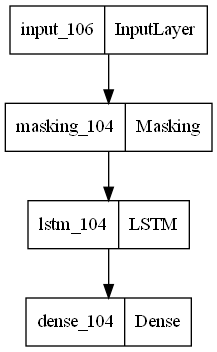

In [1506]:
# Model Path

plot_model(model)

In [1507]:
#Predict on first and second year players

Rookies = X[2600*22:2818*22]
Rook = []
i = 0
while i < 218:
    Rook.append(Rookies[i:i+21])
    i = i + 1
predictions = []
for X_batch in Rook:
  y_pred = model.predict_on_batch(X_batch)
  predictions.append(y_pred)

In [1508]:
#Predict on second year players

predictions = []
j = 1*22*19+1
for player in Rookies[19:20]:
    #print(Rookies[j-1:j+1])
    ypred1 = Rookies[j-1][0][1]
    #print(Rookies[j-1])
    y_pred2 = model.predict(Rookies[j-1:j+1])
    i = 0
    if Rookies[j+i][0][1] != 0:
        while Rookies[j+i-1][0][1] != 0:
            #print(1)
            predictions.append(Rookies[j-1+i][0][0])
            i = i + 1
    elif Rookies[j+i][0][1] == 0:
        #print(2)
        predictions.append(Rookies[j-1][0][0])
        predictions.append(Rookies[j][0][0])
    while i < 22: 
        #print(ypred1)
        #print(y_pred2)
        player = [float(ypred1),float(y_pred2[0][0])]
        predictions.append((y_pred2[0][0]))
        #print(player)
        y_pred2 = model.predict([[player]])
        ypred1 = player[1]
        i = i + 1
    j = j + 22

[[[0.115041   0.13012767]]

 [[0.13012767 0.13020959]]]
[[0.115041   0.13012767]]
1/1 [==============================] - 1s 1s/step
1
1
1/1 [==============================] - 0s 59ms/step
441


In [1525]:
# View and test the prediction
scaler.inverse_transform(np.array(predictions).reshape(-1,1))

array([[10.98394282],
       [12.42439494],
       [10.92216656],
       [ 9.93252743],
       [ 9.05047097],
       [ 8.29630323],
       [ 7.64758334],
       [ 7.090261  ],
       [ 6.61186947],
       [ 6.20175597],
       [ 5.85067055],
       [ 5.5505541 ],
       [ 5.29437188],
       [ 5.07598938],
       [ 4.89006173],
       [ 4.73194617],
       [ 4.59762061],
       [ 4.48361072],
       [ 4.38691843],
       [ 4.30497284],
       [ 4.23556658],
       [ 4.17681201]])